# Heart Failure Prediction Project

# Import libraries

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, accuracy_score, mean_absolute_error, classification_report, roc_auc_score, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# For evaluation
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Prepare Data

## Reading Dataset

In [4]:
# Import data
df = pd.read_csv(r'heart.csv')

In [5]:
# Show first 5 rows of the dataset by default
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# Show the last five rows
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
# Show the dimension of dataset(rows,columns)
df.shape

(918, 12)

In [8]:
# Display dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


It shows that there are not any missing values

In [ ]:
# print(
#       df.Sex.unique(),
#       df.ChestPainType.unique(),
#       df.RestingECG.unique(),
#       df.ExerciseAngina.unique(),
#       df.ST_Slope.unique()
# )

In [24]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [10]:
# Transform the original values (1 and 0) into (Heart disease and Normal)
mapped_target = df['HeartDisease'].map({1:'Heart disease',0:'Normal'})

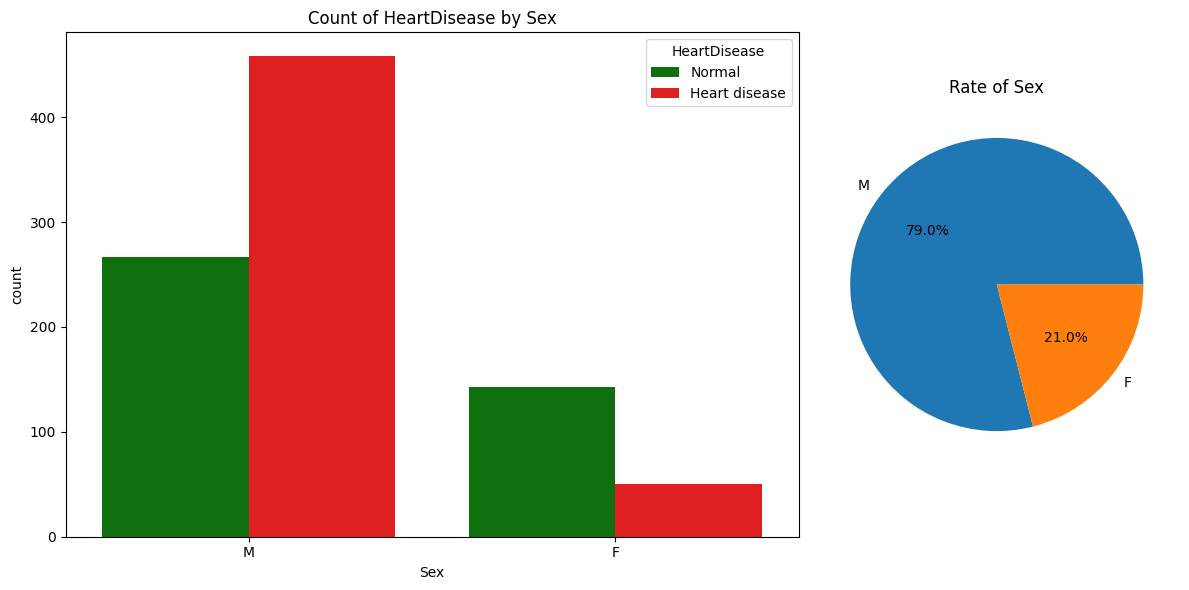

In [11]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# Show the count of HeartDisease by Sex
ax1 = fig.add_subplot(gs[0])
sns.countplot( x='Sex',hue= mapped_target, data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by Sex')
ax1.set_xlabel('Sex')

# Show Rate of Sex
ax2 = fig.add_subplot(gs[1])
types = df['Sex'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of Sex')

plt.tight_layout()
plt.show()

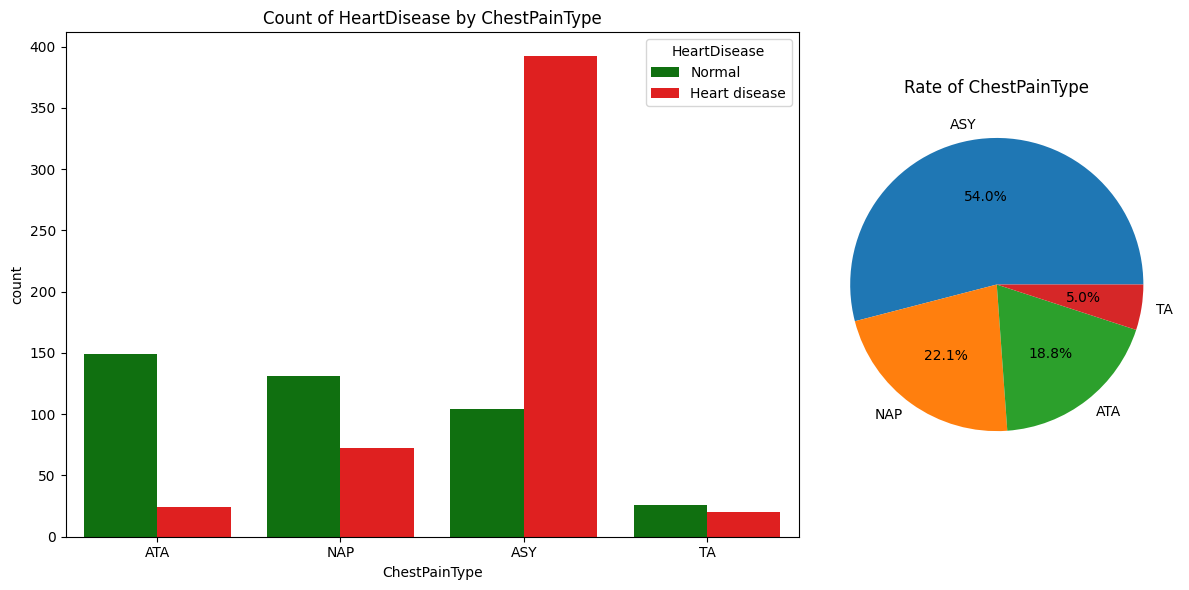

In [12]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# Show count of HeartDisease by ChestPainType
ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ChestPainType',hue=mapped_target, data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ChestPainType')

# Show rate of ChestPainType
ax2 = fig.add_subplot(gs[1])
types = df['ChestPainType'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of ChestPainType')

plt.tight_layout()
plt.show()

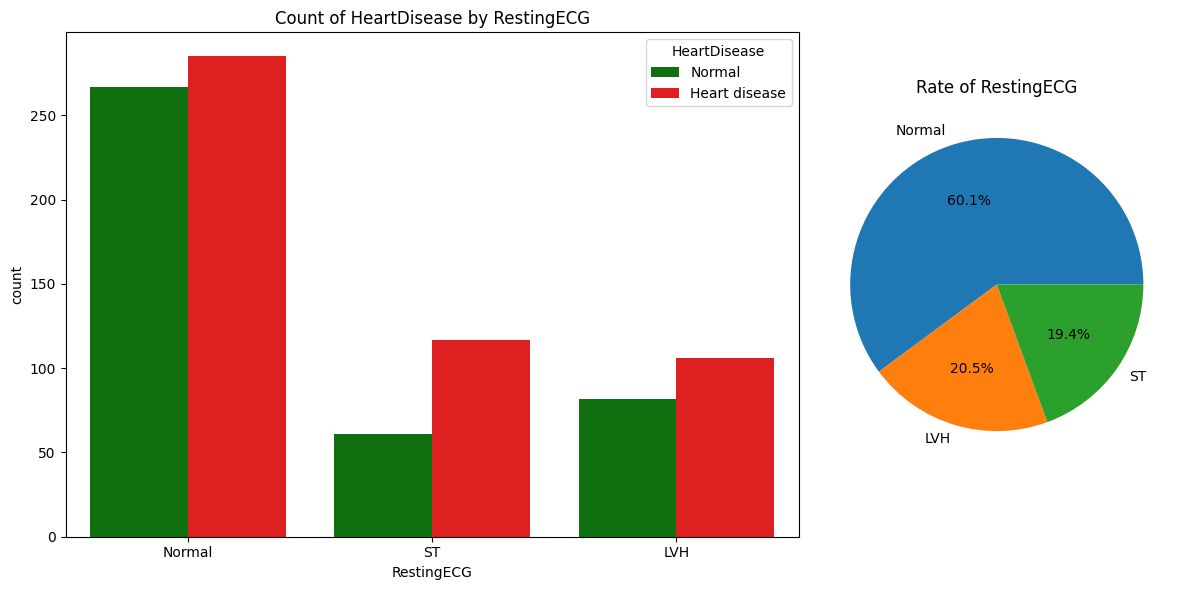

In [13]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# Show Count of HeartDisease by RestingECG
ax1 = fig.add_subplot(gs[0])
sns.countplot( x='RestingECG',hue=mapped_target, data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by RestingECG')

# Show rate of RestingECG
ax2 = fig.add_subplot(gs[1])
types = df['RestingECG'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of RestingECG')

plt.tight_layout()
plt.show()

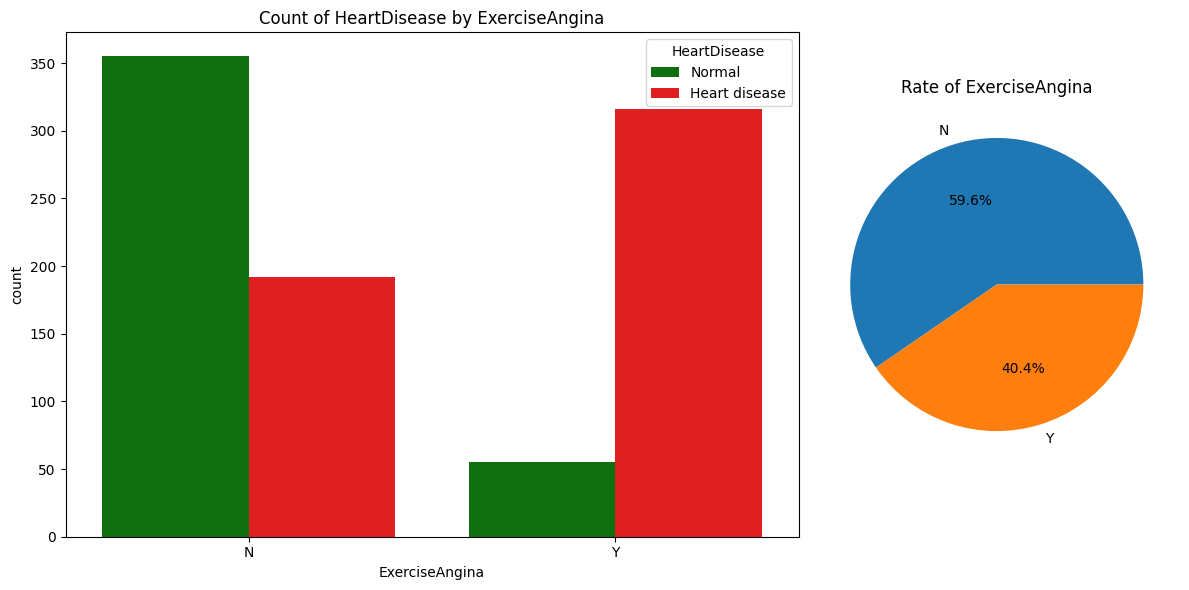

In [14]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# Show count of HeartDisease by ExerciseAngina
ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ExerciseAngina',hue=mapped_target, data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ExerciseAngina')

# Show rate of ExerciseAngina
ax2 = fig.add_subplot(gs[1])
types = df['ExerciseAngina'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of ExerciseAngina')

plt.tight_layout()
plt.show()

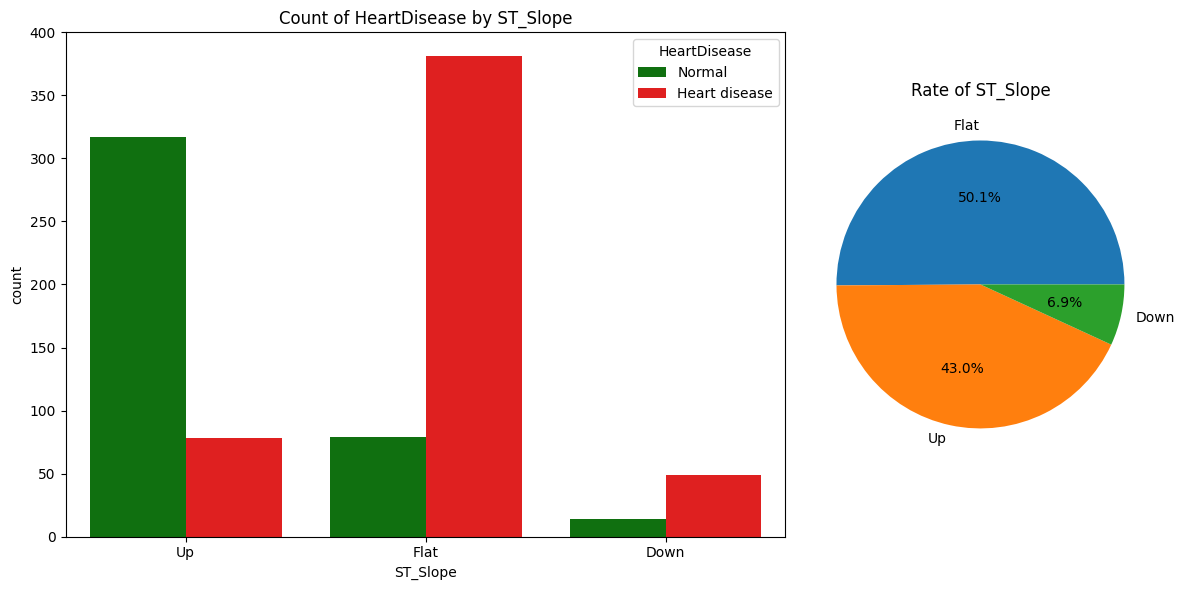

In [15]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

# Show Count of HeartDisease by ST_Slope
ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ST_Slope',hue=mapped_target, data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ST_Slope')

# Show rate of ST_Slope
ax2 = fig.add_subplot(gs[1])
types = df['ST_Slope'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of ST_Slope')

plt.tight_layout()
plt.show()

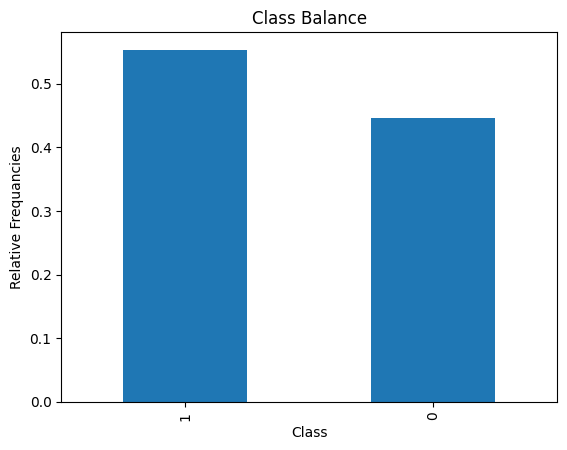

In [26]:
# Plot value counts of "HeartDisease"
df["HeartDisease"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Class",
    ylabel="Relative Frequancies",
    title="Class Balance"
);

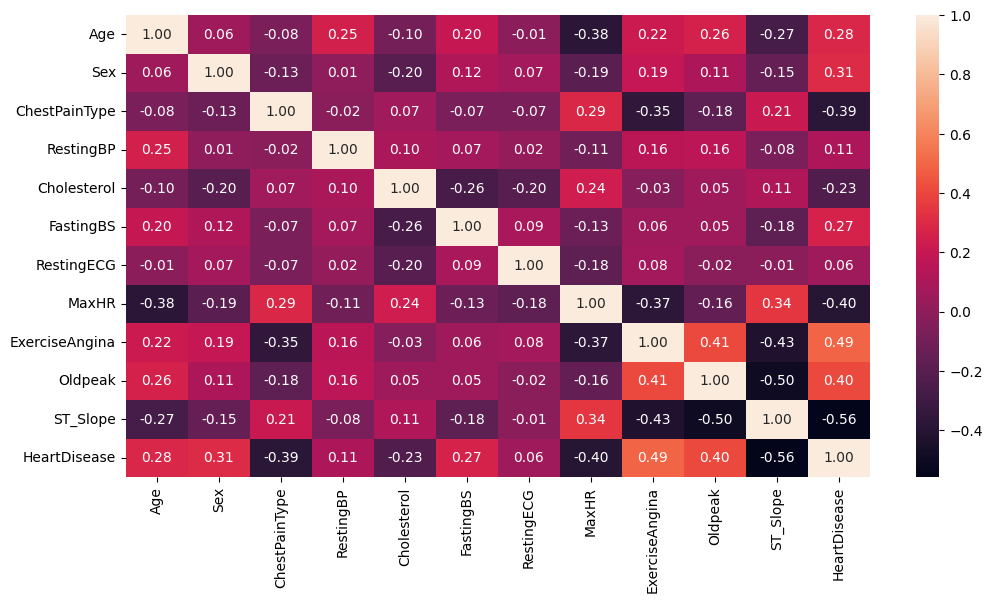

In [27]:
# Create correlation matrix
correlation = df.corr()
# Plot heatmap of `correlation`
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True, fmt=".2f");

## Split

In [16]:
# Split the Features and Target
target = "HeartDisease"
X = df.drop(columns=target)
y = df["HeartDisease"]

In [17]:
#  Using a randomized train-test split to define test set to be 20% and train set to be 80% of total data
X_train,X_test,y_train,y_test = train_test_split(
    X , y , test_size= 0.2, random_state= 42 )

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (734, 11)
y_train shape: (734,)
X_test shape: (184, 11)
y_test shape: (184,)


## Encoding the categorical data

In [23]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}

# Encode categorical variables (fit on training, transform both)
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

print("X_train:", X_train)
print("X_test:", X_test)

X_train:      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
795   42    1              2        120          240          1           1   
25    36    1              2        130          209          0           1   
84    56    1              0        150          213          1           1   
10    37    0              2        130          211          0           1   
344   51    1              0        120            0          1           1   
..   ...  ...            ...        ...          ...        ...         ...   
106   48    0              0        120          254          0           2   
270   45    1              0        120          225          0           1   
860   60    1              0        130          253          0           1   
435   60    1              0        152            0          0           2   
102   40    0              0        150          392          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Sl

#### The dataset is balanced & the target variable classes are almost equally.

## Standardize the features

In [25]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Models

## Baseline

In [28]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5463


##  Logistic Regression

In [36]:
# Build model
log_model = LogisticRegression()

# Fit model to training data
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
# Predictions
log_pred_train = log_model.predict(X_train_scaled)
log_pred_test = log_model.predict(X_test_scaled)
log_prob_test = log_model.predict_proba(X_test_scaled)[:, 1]

## Evaluation

In [55]:
# Train Accuracy
log_acc_train = accuracy_score(y_train, log_pred_train)
print(f"Train Accuracy (Logistic Regression): {log_acc_train:.4f} ")

# Test Accuracy
log_acc_test = accuracy_score(y_test, log_pred_test)
print(f"Test Accuracy (Logistic Regression): {log_acc_test:.4f} \n")

# Mean Absolute Error
print(f"MAE (Logistic Regression): {mean_absolute_error(y_test, log_pred_test):.4f}")

# AUC Score
print(f"AUC Score (Logistic Regression): {roc_auc_score(y_test, log_prob_test):.4f}")

Train Accuracy (Logistic Regression): 0.8610 
Test Accuracy (Logistic Regression): 0.8478 

MAE (Logistic Regression): 0.1522
AUC Score (Logistic Regression): 0.9008


In [56]:
# Classification Report
print(f"\nClassification Report (Logistic Regression):\n{classification_report(y_test, log_pred_test)}")



Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Logistic Regression  Confusion matrix


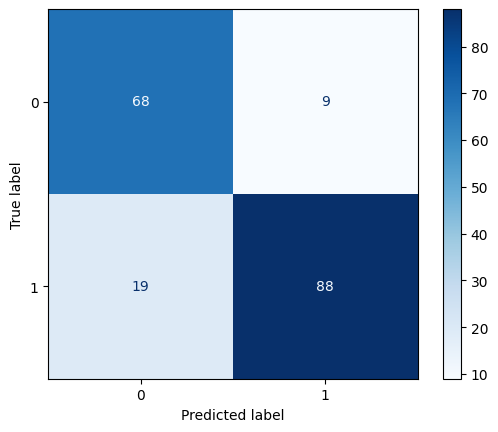

In [57]:
# Confusion matrix
print("Logistic Regression  Confusion matrix")
ConfusionMatrixDisplay.from_predictions(
    y_test,
    log_pred_test,
    cmap='Blues'
)
plt.show();

##  Support vector machine

In [46]:
#Importing the classifier
from sklearn.svm import SVC

In [47]:
# Build Model
svm_model = SVC(probability=True)

# Fit model to training data
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [58]:
# Generating predictions
svm_pred_train = svm_model.predict(X_train_scaled)
svm_pred_test = svm_model.predict(X_test_scaled)
svm_prob_test = svm_model.predict_proba(X_test_scaled)[:, 1]

## Evaluation

In [61]:
# Train Accuracy
svm_acc_train = accuracy_score(y_train, svm_pred_train)
print(f"Train Accuracy (SVM): {svm_acc_train:.4f} ")

# Test Accuracy
svm_acc_test = accuracy_score(y_test, svm_pred_test)
print(f"Test Accuracy (SVM): {svm_acc_test:.4f} \n")

# Mean Absolute Error
print(f"MAE (SVM): {mean_absolute_error(y_test, svm_pred_test):.4f}")

# AUC Score
print(f"AUC Score (SVM): {roc_auc_score(y_test, svm_prob_test):.4f}")

Train Accuracy (SVM): 0.8992 
Test Accuracy (SVM): 0.8641 

MAE (SVM): 0.1359
AUC Score (SVM): 0.9491


In [62]:
# Classification Report
print(" SVM Classification Report")
print(classification_report(y_test, svm_pred_test))

 SVM Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



SVM Confusion matrix


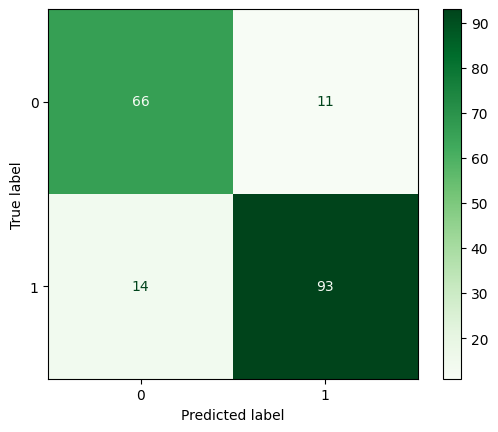

In [63]:
# Confusion matrix
print("SVM Confusion matrix")
ConfusionMatrixDisplay.from_predictions(
    y_test,
    svm_pred_test,
    cmap='Greens'
)
plt.show();

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Creating and fitting the model, as well as generating predections
rf_model = RandomForestClassifier(n_estimators= 100, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

There was an **overfitting** where **Train Accuracy (Random Forest): 1.0000** so that I add **max_depth= 5** in the model to avoid this problem

## Evaluation

In [84]:
# Predictions
rf_pred_train = rf_model.predict(X_train_scaled)
rf_pred_test = rf_model.predict(X_test_scaled)
rf_prob_test = rf_model.predict_proba(X_test_scaled)[:, 1]

In [85]:
# Train Accuracy
rf_acc_train = accuracy_score(y_train, rf_pred_train)
print(f"Train Accuracy (Random Forest): {rf_acc_train:.4f} ")

# Test Accuracy
rf_acc_test = accuracy_score(y_test, rf_pred_test)
print(f"Test Accuracy (Random Forest): {rf_acc_test:.4f} \n")

# Mean Absolute Error
print(f"MAE (Random Forest): {mean_absolute_error(y_test, rf_pred_test):.4f}")

# AUC Score
print(f"AUC Score (Random Forest): {roc_auc_score(y_test, rf_prob_test):.4f}")


Train Accuracy (Random Forest): 0.9046 
Test Accuracy (Random Forest): 0.8750 

MAE (Random Forest): 0.1250
AUC Score (Random Forest): 0.9347


In [78]:
# Classification Report
print(f"\nClassification Report (Random Forest):\n{classification_report(y_test, rf_pred_test)}")



Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



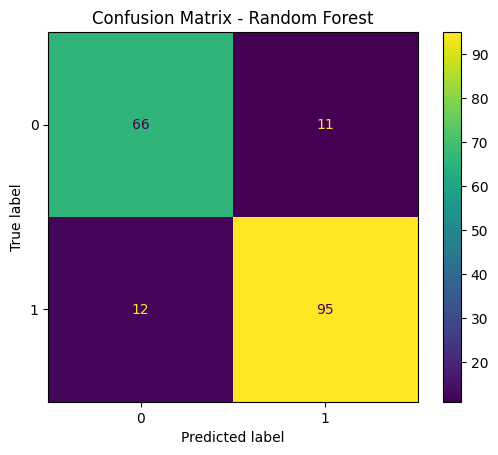

In [74]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    rf_pred_test
    )
plt.title("Confusion Matrix - Random Forest")
plt.show();